In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from sympy import symbols, Eq, sin, cos, nsolve
import pandas as pd

In [17]:
# Данные задачи для системы уравнений
f1 = lambda x, y: np.sin(x) + 2 * y - 2
f2 = lambda x, y: 2 * x + np.cos(y - 1) - 0.7

# Частные производные для матрицы Якоби
jacobian = lambda x, y: np.array([
    [np.cos(x), 2],
    [2, -np.sin(y - 1)]
])
# Точность и начальное приближение
eps = 0.001
x0, y0 = 0, 0  # начальное приближение

C:\Users\Quyntrd\AppData\Local\Temp\ipykernel_13984\2495075779.py:10: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z1, levels=[0], colors='r', label='f1 = 0')
C:\Users\Quyntrd\AppData\Local\Temp\ipykernel_13984\2495075779.py:11: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z2, levels=[0], colors='b', label='f2 = 0')


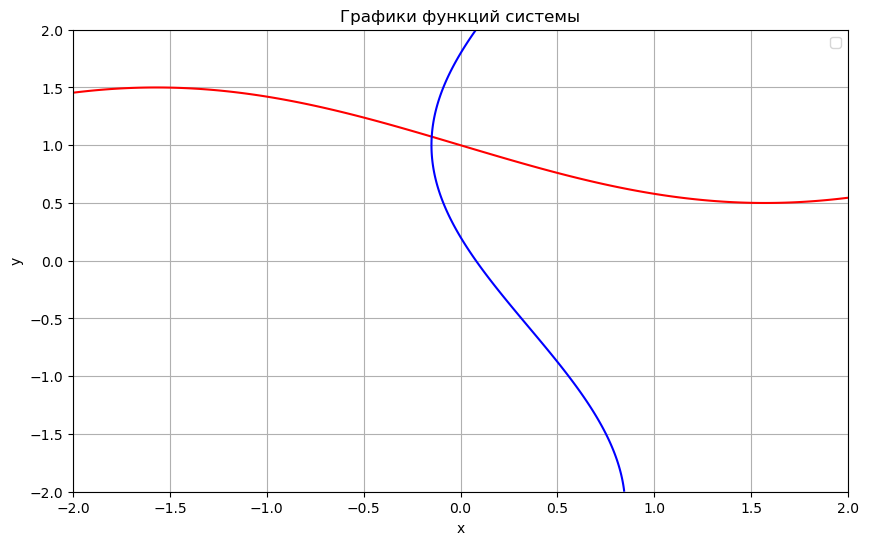

In [18]:
# 1. Построение графиков функций
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

Z1 = f1(X, Y)
Z2 = f2(X, Y)

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z1, levels=[0], colors='r', label='f1 = 0')
plt.contour(X, Y, Z2, levels=[0], colors='b', label='f2 = 0')
plt.title("Графики функций системы")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend(["f1 = 0", "f2 = 0"])
plt.show()

In [19]:
# 2. Метод Ньютона для системы уравнений
def newton_system(x0, y0, f1, f2, jacobian, eps):
    iterations = []
    xn, yn = x0, y0
    while True:
        # Вычисляем значения функций
        F = np.array([f1(xn, yn), f2(xn, yn)])

        # Вычисляем обратную матрицу Якоби и находим поправки
        J = jacobian(xn, yn)
        delta = np.linalg.solve(J, -F)

        # Новые приближения
        xn_new = xn + delta[0]
        yn_new = yn + delta[1]

        iterations.append((xn, yn, xn_new, yn_new, np.linalg.norm(delta)))

        # Условие остановки
        if np.linalg.norm(delta) < eps:
            break

        xn, yn = xn_new, yn_new

    return xn_new, yn_new, iterations

In [20]:
# Решение методом Ньютона
xn_new, yn_new, iters = newton_system(x0, y0, f1, f2, jacobian, eps)
solution = (xn_new, yn_new)

In [ ]:
# 3. Сравнение с sympy.nsolve
x_sym, y_sym = symbols('x y')
sol_sym = nsolve(
    [Eq(sin(x_sym) + 2 * y_sym, 2), Eq(2 * x_sym + cos(y_sym - 1), 0.7)],
    (x_sym, y_sym),
    (x0, y0)
)

In [22]:
# Вывод результатов
print("Решение методом Ньютона:", solution)
print("Решение с помощью sympy.nsolve:", sol_sym)

# Вывод итераций
columns = ["xn", "yn", "xn_new", "yn_new", "|delta|"]
iteration_table = pd.DataFrame(iters, columns=columns)
print("\nТаблица итераций:")
print(iteration_table)

Решение методом Ньютона: (-0.1486300816467539, 1.0740417285247357)
Решение с помощью sympy.nsolve: Matrix([[-0.148630081626293], [1.07404172850337]])

Таблица итераций:
         xn        yn    xn_new    yn_new   |delta|
0  0.000000  0.000000 -0.431703  1.215852  1.290218
1 -0.431703  1.215852 -0.152678  1.082496  0.309255
2 -0.152678  1.082496 -0.148648  1.074051  0.009358
3 -0.148648  1.074051 -0.148630  1.074042  0.000020
